# 7장. 시계열 데이터 다루기

## 1 Numpy의 polyfit으로 회귀(regression) 분석하기

#### 관리자 모드로 cmd 실행 
- pip install pandas_datareader
- pip install plotly
- conda install -c conda-forge fbprophet

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
pinkwink_web = pd.read_csv('data/07. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


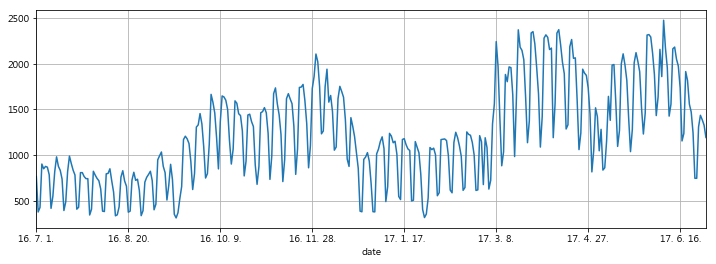

In [7]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [8]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [9]:

def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [10]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


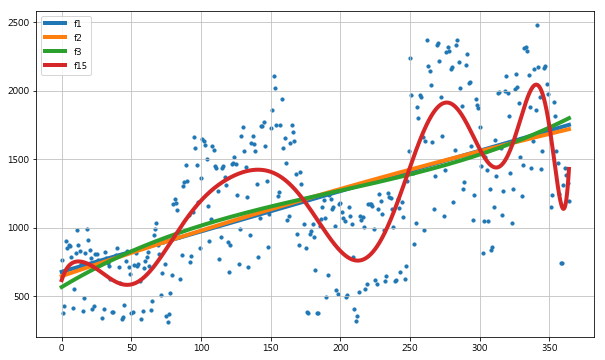

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 2. Prophet 모듈을 이용한 forecast 예측

In [12]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [13]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,697.625620,1135.163913
421,2017-08-26,496.917939,273.822625,709.854823
422,2017-08-27,629.458439,416.623216,845.824592
423,2017-08-28,1181.938386,983.844883,1392.839462
424,2017-08-29,1217.864960,1005.278565,1448.844103


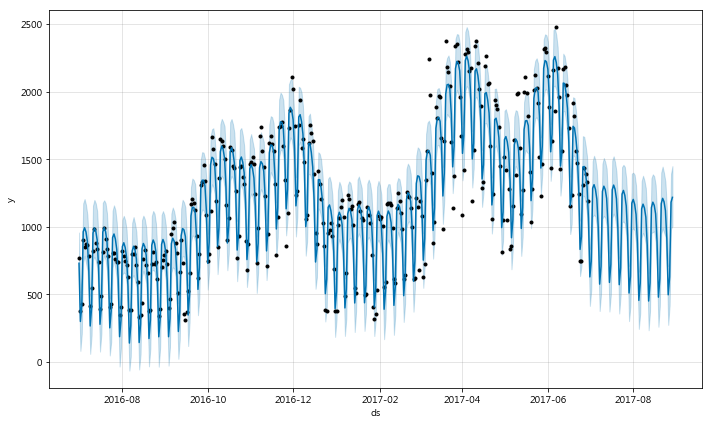

In [16]:
m.plot(forecast);

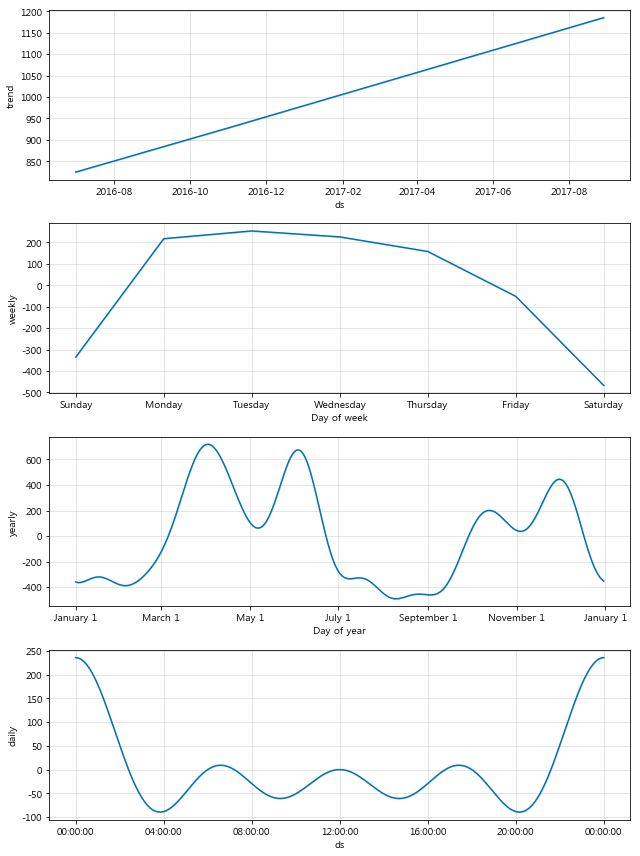

In [19]:
m.plot_components(forecast);

## 3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [32]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
Amazon = data.get_data_yahoo('AMZN', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
Amazon.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.44,2.50,1.93,1.96,1.96,72156000
1997-05-16,1.97,1.98,1.71,1.73,1.73,14700000
1997-05-19,1.76,1.77,1.62,1.71,1.71,6106800
1997-05-20,1.73,1.75,1.64,1.64,1.64,5467200
1997-05-21,1.64,1.65,1.38,1.43,1.43,18853200


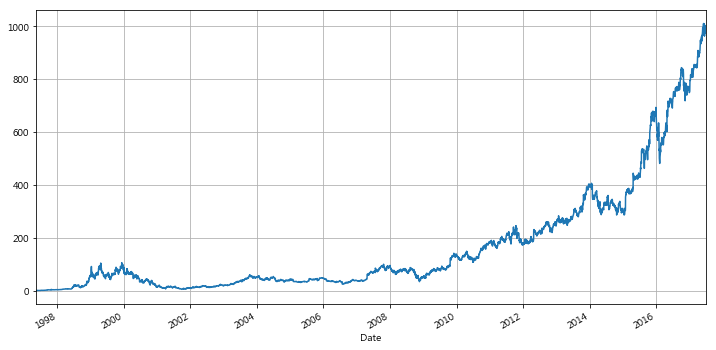

In [34]:
Amazon['Close'].plot(figsize=(12,6),grid=True);

In [36]:
Amazon_trunc=Amazon[:'2016-12-31']
Amazon_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.44,2.50,1.93,1.96,1.96,72156000
1997-05-16,1.97,1.98,1.71,1.73,1.73,14700000
1997-05-19,1.76,1.77,1.62,1.71,1.71,6106800
1997-05-20,1.73,1.75,1.64,1.64,1.64,5467200
1997-05-21,1.64,1.65,1.38,1.43,1.43,18853200
1997-05-22,1.44,1.45,1.31,1.40,1.40,11776800
1997-05-23,1.41,1.52,1.33,1.50,1.50,15937200
1997-05-27,1.51,1.65,1.46,1.58,1.58,8697600
1997-05-28,1.62,1.64,1.53,1.53,1.53,4574400


In [38]:
df = pd.DataFrame({'ds':Amazon_trunc.index, 'y':Amazon_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,1997-05-15,1.96
1,1997-05-16,1.73
2,1997-05-19,1.71
3,1997-05-20,1.64
4,1997-05-21,1.43


In [40]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [41]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5301,2017-12-26
5302,2017-12-27
5303,2017-12-28
5304,2017-12-29
5305,2017-12-30


In [42]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5301,2017-12-26,851.866499,800.412604,902.671627
5302,2017-12-27,851.865118,801.583515,900.692706
5303,2017-12-28,852.521880,802.106044,901.523540
5304,2017-12-29,852.277938,805.550981,901.760093
5305,2017-12-30,854.487712,804.591392,905.230774


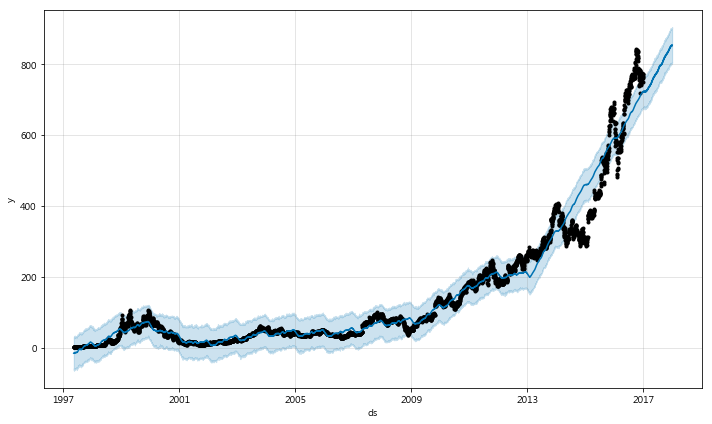

In [45]:
m.plot(forecast);

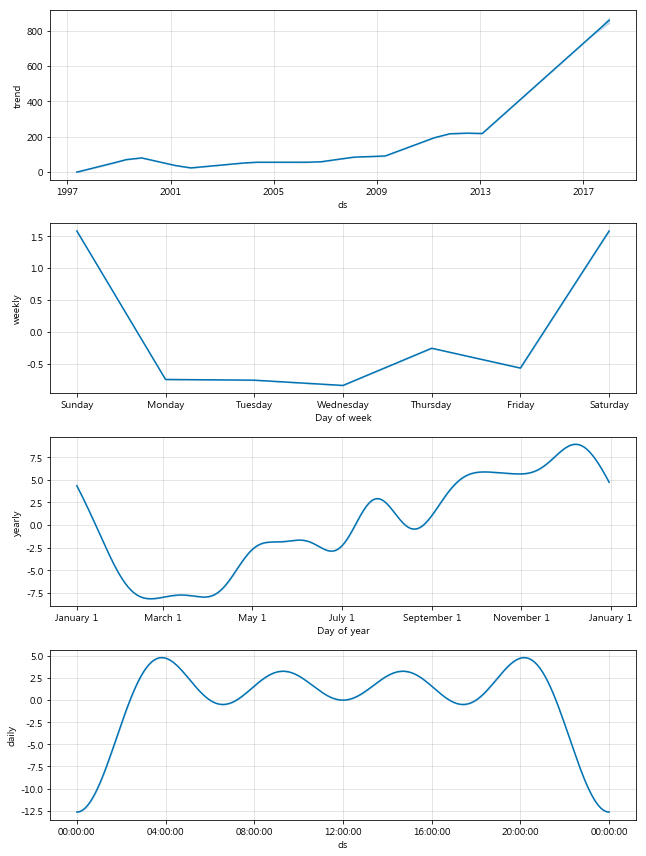

In [46]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


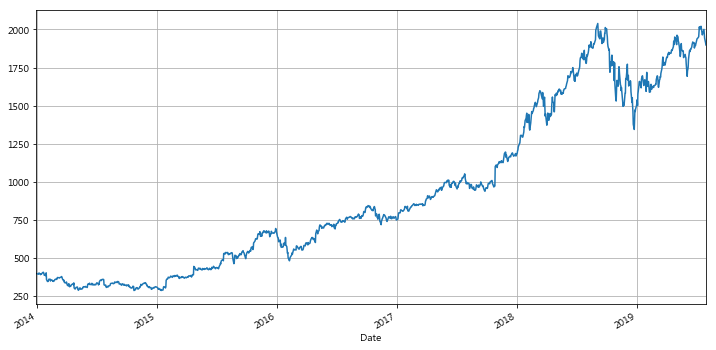

In [57]:
start_date = '2014-1-1' 
end_date = '2019-7-31' 
Amazon = data.get_data_yahoo('AMZN', start_date, end_date)
Amazon['Close'].plot(figsize=(12,6), grid=True);

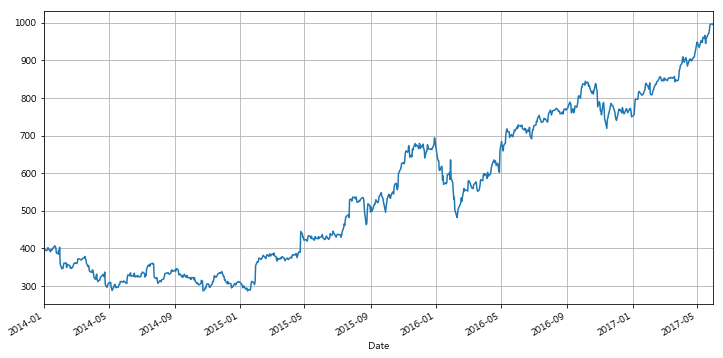

In [48]:
Amazon_trunc = Amazon[:'2017-05-31']
Amazon_trunc['Close'].plot(figsize=(12,6), grid=True);

In [49]:
df = pd.DataFrame({'ds':Amazon_trunc.index, 'y':Amazon_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [50]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [54]:
future=m.make_future_dataframe(periods=661)
future.tail()

,ds
1516,2019-03-19
1517,2019-03-20
1518,2019-03-21
1519,2019-03-22
1520,2019-03-23


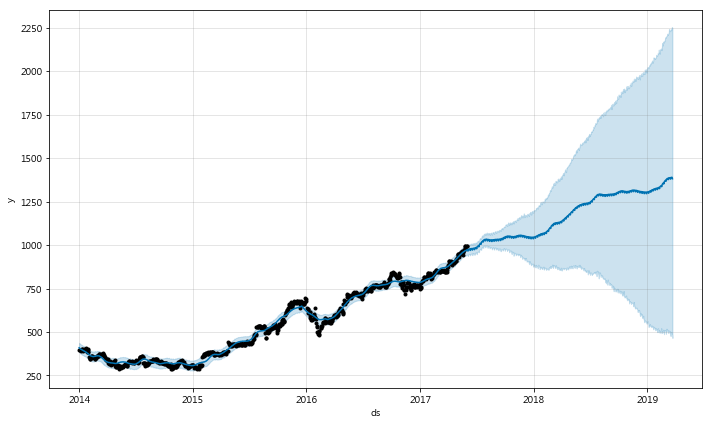

In [55]:
forecast = m.predict(future)
m.plot(forecast);

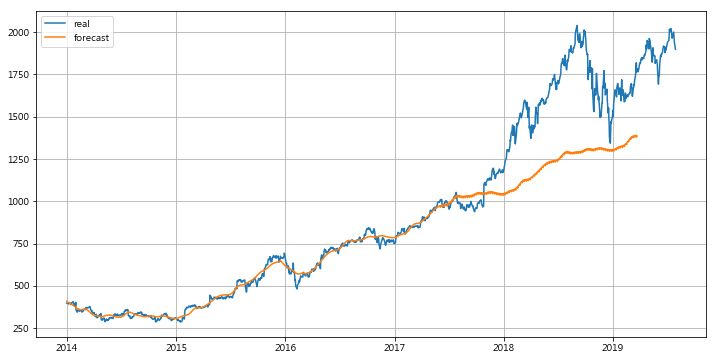

In [58]:
plt.figure(figsize=(12,6))
plt.plot(Amazon.index, Amazon['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 4 Growth Model과 Holiday Forecast